In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
from os import path
import shutil
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [2]:
def GetStandardScaler(trainData, testData):
    standard_scaler = preprocessing.StandardScaler()
    x_train_ss = standard_scaler.fit_transform(trainData)
    x_test_ss = standard_scaler.transform(testData)
    return x_train_ss, x_test_ss

def SVMLearning(x_train, x_test, y_train, y_test, cols, dir):
    global datedAccuracy
    clf = SVC(gamma='auto', kernel='linear')
    clf.fit(x_train, y_train)
    yhat = clf.predict(x_test)
    acc = np.mean(yhat == y_test)
    f1Score = f1_score(y_test, yhat, average='weighted')
    print("Accuracy with SVM standard-scaled data: ",acc * 100)
    print("F1 Score: ",f1Score * 100)
    #datedAccuracy[dir] = acc * 100
    datedAccuracy[dir] = acc
    datedF1Score[dir] = f1Score * 100

    importance = (clf.coef_).reshape((len(cols),))
    features_sorted = np.array(cols)[np.argsort(importance)[::-1]]
    print(features_sorted[:5])
    datedFeatures[dir] = features_sorted[:5]

baseDir = 'Processed-Yearly-Dataset'
listDir = [f for f in listdir(baseDir)]
listDir.sort()
datedAccuracy = dict()
datedF1Score = dict()
datedFeatures = dict()

for dir in listDir:
    x_train_df = pd.read_csv(os.path.join(baseDir, dir, 'x_train.txt'), sep=",")
    x_test_df = pd.read_csv(os.path.join(baseDir, dir, 'x_test.txt'), sep=",")
    cols = list(x_train_df.columns)

    y_train = np.loadtxt(os.path.join(baseDir, dir, 'y_train.txt'))
    y_test = np.loadtxt(os.path.join(baseDir, dir, 'y_test.txt'))

    x_train = x_train_df.to_numpy()
    x_test = x_test_df.to_numpy()

    print('\nResults for %s --' %(dir))
    x_train_ss, x_test_ss = GetStandardScaler(x_train, x_test)
    SVMLearning(x_train_ss, x_test_ss, y_train, y_test, cols, dir)


Results for 2016-10 --
Accuracy with SVM standard-scaled data:  100.0
F1 Score:  100.0
['minFlt' 'AXIWRITE' 'se_vruntime' 'L2STORE' 'ioac_syscw']

Results for 2016-11 --
Accuracy with SVM standard-scaled data:  100.0
F1 Score:  100.0
['minFlt' 'se_vruntime' 'se_prevSumExecRuntime' 'ioac_syscw' 'AXIWRITE']

Results for 2016-4 --
Accuracy with SVM standard-scaled data:  98.36065573770492
F1 Score:  98.35798652045288
['schedInfo_runDelay' 'ioac_syscw' 'minFlt' 'ETMEXTOUT1' 'ERETURN']

Results for 2016-5 --
Accuracy with SVM standard-scaled data:  100.0
F1 Score:  100.0
['minFlt' 'se_vruntime' 'schedInfo_runDelay' 'AXIWRITE' 'L2STORE']

Results for 2016-6 --
Accuracy with SVM standard-scaled data:  100.0
F1 Score:  100.0
['minFlt' 'AXIWRITE' 'L2STORE' 'se_vruntime' 'schedInfo_runDelay']

Results for 2016-7 --
Accuracy with SVM standard-scaled data:  100.0
F1 Score:  100.0
['minFlt' 'AXIWRITE' 'L2STORE' 'DCHASHMISS' 'se_vruntime']

Results for 2017-10 --
Accuracy with SVM standard-scaled d

<Figure size 432x288 with 0 Axes>

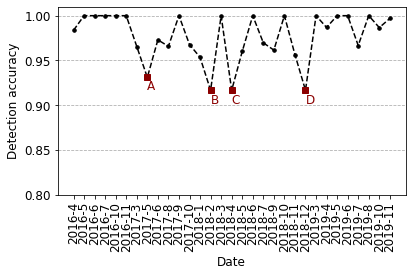

In [14]:
orderedAccuracy = []
orderedF1Score = []
orderedDates = ['2016-4', '2016-5', '2016-6', '2016-7', '2016-10', '2016-11', '2017-3'
                , '2017-5', '2017-6', '2017-8', '2017-9', '2017-10', '2018-1', '2018-2'
                , '2018-3', '2018-4', '2018-5', '2018-6', '2018-7', '2018-9', '2018-10'
                , '2018-11', '2018-12', '2019-3', '2019-4', '2019-5', '2019-6', '2019-7'
                , '2019-8', '2019-10']

for date in orderedDates:
    orderedAccuracy.append(datedAccuracy[date])
    orderedF1Score.append(datedF1Score[date])
    #print(date, datedAccuracy[date])

plt.figure()
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"
plt.plot(orderedDates + ['2019-11'], orderedAccuracy + [0.9968847352024922], '--', color='black')
plt.plot(orderedDates + ['2019-11'], orderedAccuracy + [0.9968847352024922], 'o', color='black', markersize=3.5)

driftColor = 'darkred'
conceptSize = 6
plt.plot(['2017-5'], [0.9310344827586206], 's', color=driftColor, markersize=conceptSize)
plt.plot(['2018-2'], [0.9166666666666666], 's', color=driftColor, markersize=conceptSize)
plt.plot(['2018-4'], [0.9166666666666666], 's', color=driftColor, markersize=conceptSize)
plt.plot(['2018-12'], [0.9166666666666666], 's', color=driftColor, markersize=conceptSize)

style = dict(size=12, color=driftColor)
ax.text(['2017-5'], 0.917, "A", **style)
ax.text(['2018-2'], 0.902, "B", **style)
ax.text(['2018-4'], 0.902, "C", **style)
ax.text(['2018-12'], 0.902, "D", **style)

plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Detection accuracy')
#plt.title('Concept Drift')

axes = plt.gca()
axes.set_ylim([0.80,1.01])

plt.tight_layout()
plt.savefig("concept-drift.pdf", bbox_inches='tight', dpi=600)
plt.savefig("concept-drift.png", bbox_inches='tight', dpi=600)
plt.show()
